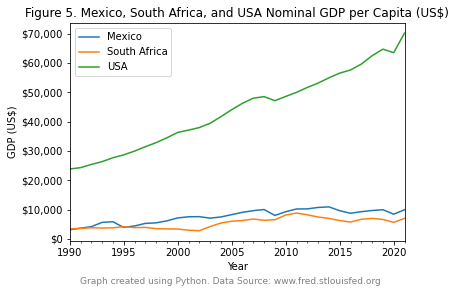

<Figure size 432x288 with 0 Axes>

In [29]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

# Add API key
fred = Fred(api_key='82ebb432b69e0c2dfd081cfc2cadf643')

# Get the GDP data for desired countries
mexico_gdp_per_capita = fred.get_series('PCAGDPMXA646NWDB')
south_africa_gdp_per_capita = fred.get_series('PCAGDPZAA646NWDB')
usa_gdp_per_capita = fred.get_series('A939RC0A052NBEA')

# Concatenate the data into one data frame and assign columns
df = pd.concat([mexico_gdp_per_capita, south_africa_gdp_per_capita, usa_gdp_per_capita], axis=1)
df.columns = ['Mexico', 'South Africa', 'USA']

# Filter for the time period
df = df['1990-01-01':'2021-01-01']

# Plot the data
df.plot()

# Define a function to format the y-tick labels
def with_dollars_and_commas(x, pos):
    return '${:,.0f}'.format(x)

# Use the FuncFormatter function to specify the formatter
formatter = FuncFormatter(with_dollars_and_commas)

# Set the formatter for the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# Add axis labels
plt.xlabel('Year')
plt.ylabel('GDP (US$)')

# Add a title
plt.title('Figure 5. Mexico, South Africa, and USA Nominal GDP per Capita (US$)')

# Add a footnote below x-axis
text = ('Graph created using Python. Data Source: www.fred.stlouisfed.org ')
plt.figtext(0.5, - 0.025, text, wrap=True, horizontalalignment='center', fontsize=9, color='grey')

plt.show()

# Save the table
plt.savefig('mexico_sa_usa_nominalgdp_percapita.png')
